# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [2]:
# load in the data
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=',')
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=',')

d:\ProgramData\Miniconda3\envs\hackthon\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

In [4]:
azdias.head(5).T

,0,1,2,3,4
LNR,910215,910220,910225,910226,910241
AGER_TYP,-1,-1,-1,2,-1
AKT_DAT_KL,NaN,9,9,1,1
ALTER_HH,NaN,0,17,13,20
ALTER_KIND1,NaN,NaN,NaN,NaN,NaN
ALTER_KIND2,NaN,NaN,NaN,NaN,NaN
ALTER_KIND3,NaN,NaN,NaN,NaN,NaN
ALTER_KIND4,NaN,NaN,NaN,NaN,NaN
ALTERSKATEGORIE_FEIN,NaN,21,17,13,14
ANZ_HAUSHALTE_AKTIV,NaN,11,10,1,3


In [5]:
customers.head(5).T

,0,1,2,3,4
LNR,9626,9628,143872,143873,143874
AGER_TYP,2,-1,-1,1,-1
AKT_DAT_KL,1,9,1,1,1
ALTER_HH,10,11,6,8,20
ALTER_KIND1,NaN,NaN,NaN,NaN,NaN
ALTER_KIND2,NaN,NaN,NaN,NaN,NaN
ALTER_KIND3,NaN,NaN,NaN,NaN,NaN
ALTER_KIND4,NaN,NaN,NaN,NaN,NaN
ALTERSKATEGORIE_FEIN,10,NaN,0,8,14
ANZ_HAUSHALTE_AKTIV,1,NaN,1,0,7


In [6]:
# show all observation-related columns/rows
pd.options.display.max_rows = None


In [7]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 369 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(8)
memory usage: 539.5+ MB


In [9]:
customers['CUSTOMER_GROUP'].unique()

array(['MULTI_BUYER', 'SINGLE_BUYER'], dtype=object)

In [10]:
customers['PRODUCT_GROUP'].unique()

array(['COSMETIC_AND_FOOD', 'FOOD', 'COSMETIC'], dtype=object)

In [11]:
customers['ONLINE_PURCHASE'].unique()

array([0, 1], dtype=int64)

In [12]:
# try to find out the unique value per column, vision abnormal value
for col in customers.columns:
    print(col)
    print(customers[col].unique())

LNR
[  9626   9628 143872 ... 148813 148852 148883]
AGER_TYP
[ 2 -1  1  0  3]
AKT_DAT_KL
[ 1.  9.  3.  7.  5.  2. nan  4.  6.  8.]
ALTER_HH
[10. 11.  6.  8. 20.  5. 14. 21. 15. 17.  0. 19.  9. 12. 13. nan 18.  7.
 16.  4.  2.  3.]
ALTER_KIND1
[nan  8. 12.  9.  7. 13. 17. 14. 18. 11. 16.  6. 10. 15.  5.  3.  4.  2.]
ALTER_KIND2
[nan  9. 17. 10. 14. 13. 12. 11. 16. 18. 15.  7.  5.  8.  6.  3.  2.  4.]
ALTER_KIND3
[nan 13. 16. 18. 15. 17. 14. 12. 11. 10.  8.  7.  9.  6.  5.]
ALTER_KIND4
[nan 18. 12. 16. 13. 17. 11. 14. 15. 10.  8.]
ALTERSKATEGORIE_FEIN
[10. nan  0.  8. 14.  9.  4. 13.  6. 12. 19. 17. 15. 11. 16.  7. 18. 21.
 25. 20. 24.  5.  2. 22.  3. 23.]
ANZ_HAUSHALTE_AKTIV
[  1.  nan   0.   7.  74.   9.  17.  12.  29.   2.  45.  10.  14.  15.
  55.   6.   5. 108.   3.  25.  18.   4.  11.  19.   8.  26.  43.  63.
  47.  16.  31.  57.  37.  13.  22.  20.  23.  27. 305.  52.  21.  34.
  46.  24.  33.  51. 523. 104. 101.  59.  44.  38.  61.  69.  28.  48.
  40.  39. 145. 107.  32.  76. 11

[ 4. nan  2.  3.  1.  5.]
GEBAEUDETYP
[ 1. nan  8.  2.  3.  4.  6.]
GEBAEUDETYP_RASTER
[ 4. nan  3.  2.  5.  1.]
GEBURTSJAHR
[   0 1960 1942 1938 1914 1959 1943 1964 1961 1923 1953 1985 1963 1965
 1947 1930 1962 1967 1935 1948 1955 1931 1956 1945 1937 1932 1971 1976
 1974 1925 1939 1950 1980 1984 1949 1941 1970 1966 1926 1929 1957 1954
 1934 1977 1995 1936 1946 1928 1958 1979 1940 1933 1951 1972 1952 1968
 1981 1975 1969 1982 1973 1927 1944 1924 1978 1996 2017 1992 1987 1921
 2014 1986 1919 1990 2012 2016 1902 1994 2002 1999 1983 1916 1920 2013
 1991 1922 1918 1989 1988 1997 1993 2015 2000 1998 1915 2003 1910 2001
 1917 1900 2005 2009 2008 1912 2006 1913 1911 2011 2004 2010 2007 1909
 1908]
GEMEINDETYP
[50. nan 22. 40. 12. 30. 21. 11.]
GFK_URLAUBERTYP
[ 4. nan  3. 10.  2. 11.  8.  1.  5.  9. 12.  7.  6.]
GREEN_AVANTGARDE
[1 0]
HEALTH_TYP
[ 1  2  3 -1]
HH_DELTA_FLAG
[ 0.  1. nan]
HH_EINKOMMEN_SCORE
[ 1. nan  4.  6.  2.  3.  5.]
INNENSTADT
[ 4. nan  1.  7.  8.  5.  6.  2.  3.]
KBA05_ALTE

[ 1. nan  3.  2.  4.  5.]
KBA13_SITZE_6
[ 5. nan  4.  3.  2.  1.]
KBA13_TOYOTA
[ 2. nan  3.  5.  4.  1.]
KBA13_VORB_0
[ 4. nan  3.  5.  2.  1.]
KBA13_VORB_1
[ 3. nan  2.  4.  1.  5.]
KBA13_VORB_1_2
[ 3. nan  2.  4.  1.  5.]
KBA13_VORB_2
[ 3. nan  2.  4.  1.  5.]
KBA13_VORB_3
[ 1. nan  4.  3.  0.  2.  5.]
KBA13_VW
[ 4. nan  3.  1.  2.  5.]
KK_KUNDENTYP
[nan  2.  5.  4.  1.  3.  6.]
KKK
[ 1. nan  3.  4.  2.  0.]
KOMBIALTER
[4 3 2 9 1]
KONSUMNAEHE
[ 5.  1.  2.  4.  3.  6. nan  7.]
KONSUMZELLE
[ 0. nan  1.]
LP_FAMILIE_FEIN
[ 2. nan  1.  0. 10.  8.  6. 11.  9.  7.  5.  3.  4.]
LP_FAMILIE_GROB
[ 2. nan  1.  0.  5.  4.  3.]
LP_LEBENSPHASE_FEIN
[20. nan 13.  0. 31. 17.  6. 28.  5. 27. 40. 35.  2. 19. 38. 36.  8. 34.
 10. 12. 26. 11.  9. 37. 14. 39. 32.  7. 15. 23. 21. 25. 33. 16. 24. 30.
 18.  4. 22.  1. 29.  3.]
LP_LEBENSPHASE_GROB
[ 5. nan  3.  0. 10.  2.  8. 12. 11.  1.  4.  6.  7.  9.]
LP_STATUS_FEIN
[10. nan  9.  1.  7.  6.  3.  5.  8.  4.  2.]
LP_STATUS_GROB
[ 5. nan  4.  1.  3.  2.]
MIN

In [13]:
# try to find out the rate of missing values
cust_missing_rate=(customers.shape[0] - customers.count())/customers.shape[0] * 100
cust_missing_rate

LNR                             0.000000
AGER_TYP                        0.000000
AKT_DAT_KL                     24.312817
ALTER_HH                       24.312817
ALTER_KIND1                    93.860748
ALTER_KIND2                    97.338927
ALTER_KIND3                    99.334732
ALTER_KIND4                    99.876860
ALTERSKATEGORIE_FEIN           27.050070
ANZ_HAUSHALTE_AKTIV            26.050863
ANZ_HH_TITEL                   27.189907
ANZ_KINDER                     24.312817
ANZ_PERSONEN                   24.312817
ANZ_STATISTISCHE_HAUSHALTE     26.050863
ANZ_TITEL                      24.312817
ARBEIT                         26.337320
BALLRAUM                       26.067560
CAMEO_DEU_2015                 26.312274
CAMEO_DEUG_2015                26.312274
CAMEO_INTL_2015                26.312274
CJT_GESAMTTYP                   1.676476
CJT_KATALOGNUTZER               1.676476
CJT_TYP_1                       1.676476
CJT_TYP_2                       1.676476
CJT_TYP_3       

### Data Cleaning:

1. find the rate of missing data per columns, seperately.


In [14]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

In [15]:
artr_in_excel = ['AGER_TYP',
'ALTERSKATEGORIE_GROB',
'ANREDE_KZ',
'CJT_GESAMTTYP',
'FINANZ_MINIMALIST',
'FINANZ_SPARER',
'FINANZ_VORSORGER',
'FINANZ_ANLEGER',
'FINANZ_UNAUFFAELLIGER',
'FINANZ_HAUSBAUER',
'FINANZTYP',
'GEBURTSJAHR',
'GFK_URLAUBERTYP',
'GREEN_AVANTGARDE',
'HEALTH_TYP',
'LP_LEBENSPHASE_FEIN',
'LP_LEBENSPHASE_GROB',
'LP_FAMILIE_FEIN',
'LP_FAMILIE_GROB',
'LP_STATUS_FEIN',
'LP_STATUS_GROB',
'NATIONALITAET_KZ',
'PRAEGENDE_JUGENDJAHRE',
'RETOURTYP_BK_S',
'SEMIO_SOZ',
'SEMIO_FAM',
'SEMIO_REL',
'SEMIO_MAT',
'SEMIO_VERT',
'SEMIO_LUST',
'SEMIO_ERL',
'SEMIO_KULT',
'SEMIO_RAT',
'SEMIO_KRIT',
'SEMIO_DOM',
'SEMIO_KAEM',
'SEMIO_PFLICHT',
'SEMIO_TRADV',
'SHOPPER_TYP',
'SOHO_FLAG',
'TITEL_KZ',
'VERS_TYP',
'ZABEOTYP',
'ALTER_HH',
'ANZ_PERSONEN',
'ANZ_TITEL',
'HAUSHALTSSTRUKTUR',
'HH_EINKOMMEN_SCORE',
'D19_KK_KUNDENTYP',
'D19_KONSUMTYP',
'D19_GESAMT_ANZ_12',
'D19_GESAMT_ANZ_24',
'D19_BANKEN_ANZ_12',
'D19_BANKEN_ANZ_24',
'D19_TELKO_ANZ_12',
'D19_TELKO_ANZ_24',
'D19_VERSI_ANZ_12',
'D19_VERSI_ANZ_24',
'D19_VERSAND_ANZ_12',
'D19_VERSAND_ANZ_24',
'D19_GESAMT_OFFLINE_DATUM',
'D19_GESAMT_ONLINE_DATUM',
'D19_GESAMT_DATUM',
'D19_BANKEN_OFFLINE_DATUM',
'D19_BANKEN_ONLINE_DATUM',
'D19_BANKEN_DATUM',
'D19_TELKO_OFFLINE_DATUM',
'D19_TELKO_ONLINE_DATUM',
'D19_TELKO_DATUM',
'D19_VERSAND_OFFLINE_DATUM',
'D19_VERSAND_ONLINE_DATUM',
'D19_VERSAND_DATUM',
'D19_VERSI_OFFLINE_DATUM',
'D19_VERSI_ONLINE_DATUM',
'D19_VERSI_DATUM',
'D19_GESAMT_ONLINE_QUOTE_12',
'D19_BANKEN_ONLINE_QUOTE_12',
'D19_VERSAND_ONLINE_QUOTE_12',
'W_KEIT_KIND_HH',
'WOHNDAUER_2008',
'ANZ_HAUSHALTE_AKTIV',
'ANZ_HH_TITEL',
'GEBAEUDETYP',
'GEOSCORE_KLS7',
'KBA05_HERSTTEMP',
'KBA05_MODTEMP',
'KONSUMNAEHE',
'MIN_GEBAEUDEJAHR',
'OST_WEST_KZ',
'WOHNLAGE',
'CAMEO_DEUG_2015',
'CAMEO_DEU_2015',
'CAMEO_DEUINTL_2015',
'KBA05_ALTER1',
'KBA05_ALTER2',
'KBA05_ALTER3',
'KBA05_ALTER4',
'KBA05_ANHANG',
'KBA05_ANTG1',
'KBA05_ANTG2',
'KBA05_ANTG3',
'KBA05_ANTG4',
'KBA05_AUTOQUOT',
'KBA05_BAUMAX',
'KBA05_CCM1',
'KBA05_CCM2',
'KBA05_CCM3',
'KBA05_CCM4',
'KBA05_DIESEL',
'KBA05_FRAU',
'KBA05_GBZ',
'KBA05_HERST1',
'KBA05_HERST2',
'KBA05_HERST3',
'KBA05_HERST4',
'KBA05_HERST5',
'KBA05_KRSAQUOT',
'KBA05_KRSHERST1',
'KBA05_KRSHERST2',
'KBA05_KRSHERST3',
'KBA05_KRSKLEIN',
'KBA05_KRSOBER',
'KBA05_KRSVAN',
'KBA05_KRSZUL',
'KBA05_KW1',
'KBA05_KW2',
'KBA05_KW3',
'KBA05_MAXAH',
'KBA05_MAXBJ',
'KBA05_MAXHERST',
'KBA05_MAXSEG',
'KBA05_MAXVORB',
'KBA05_MOD1',
'KBA05_MOD2',
'KBA05_MOD3',
'KBA05_MOD4',
'KBA05_MOD8',
'KBA05_MOTOR',
'KBA05_MOTRAD',
'KBA05_SEG1',
'KBA05_SEG2',
'KBA05_SEG3',
'KBA05_SEG4',
'KBA05_SEG5',
'KBA05_SEG6',
'KBA05_SEG7',
'KBA05_SEG8',
'KBA05_SEG9',
'KBA05_SEG10',
'KBA05_VORB0',
'KBA05_VORB1',
'KBA05_VORB2',
'KBA05_ZUL1',
'KBA05_ZUL2',
'KBA05_ZUL3',
'KBA05_ZUL4',
'WACHSTUMSGEBIET_NB',
'D19_BANKEN_DIREKT',
'D19_BANKEN_GROSS',
'D19_BANKEN_LOKAL',
'D19_BANKEN_REST',
'D19_BEKLEIDUNG_GEH',
'D19_BEKLEIDUNG_REST',
'D19_BIO_OEKO',
'D19_BILDUNG',
'D19_BUCH_CD',
'D19_DIGIT_SERV',
'D19_DROGERIEARTIKEL',
'D19_ENERGIE',
'D19_FREIZEIT',
'D19_GARTEN',
'D19_HANDWERK',
'D19_HAUS_DEKO',
'D19_KINDERARTIKEL',
'D19_KOSMETIK',
'D19_LEBENSMITTEL',
'D19_NAHRUNGSERGAENZUNG',
'D19_RATGEBER',
'D19_REISEN',
'D19_SAMMELARTIKEL',
'D19_SCHUHE',
'D19_SONSTIGE',
'D19_TECHNIK',
'D19_TELKO_MOBILE',
'D19_TELKO_REST',
'D19_TIERARTIKEL',
'D19_VERSICHERUNGEN',
'D19_VOLLSORTIMENT',
'D19_VERSAND_REST',
'D19_WEIN_FEINKOST',
'BALLRAUM',
'EWDICHTE',
'INNENSTADT',
'PLZ',
'GEBAEUDETYP_RASTER',
'KKK',
'MOBI_REGIO',
'ONLINE_AFFINITAET',
'REGIOTYP',
'KBA13_ALTERHALTER_30',
'KBA13_ALTERHALTER_45',
'KBA13_ALTERHALTER_60',
'KBA13_ALTERHALTER_61',
'KBA13_ANZAHL_PKW',
'KBA13_AUDI',
'KBA13_AUTOQUOTE',
'KBA13_BJ_1999',
'KBA13_BJ_2000',
'KBA13_BJ_2004',
'KBA13_BJ_2006',
'KBA13_BJ_2008',
'KBA13_BJ_2009',
'KBA13_BMW',
'KBA13_CCM_1000',
'KBA13_CCM_1200',
'KBA13_CCM_1400',
'KBA13_CCM_0_1400',
'KBA13_CCM_1500',
'KBA13_CCM_1400_2500',
'KBA13_CCM_1600',
'KBA13_CCM_1800',
'KBA13_CCM_2000',
'KBA13_CCM_2500',
'KBA13_CCM_2501',
'KBA13_FAB_ASIEN',
'KBA13_FAB_SONSTIGE',
'KBA13_FIAT',
'KBA13_FORD',
'KBA13_HALTER_20',
'KBA13_HALTER_25',
'KBA13_HALTER_30',
'KBA13_HALTER_35',
'KBA13_HALTER_40',
'KBA13_HALTER_45',
'KBA13_HALTER_50',
'KBA13_HALTER_55',
'KBA13_HALTER_60',
'KBA13_HALTER_65',
'KBA13_HALTER_66',
'KBA13_HERST_ASIEN',
'KBA13_HERST_AUDI_VW',
'KBA13_HERST_BMW_BENZ',
'KBA13_HERST_EUROPA',
'KBA13_HERST_FORD_OPEL',
'KBA13_HERST_SONST',
'KBA13_KMH_110',
'KBA13_KMH_140',
'KBA13_KMH_180',
'KBA13_KMH_0_140',
'KBA13_KMH_140_210',
'KBA13_KMH_211',
'KBA13_KMH_250',
'KBA13_KMH_251',
'KBA13_KRSAQUOT',
'KBA13_KRSHERST_AUDI_VW',
'KBA13_KRSHERST_BMW_BENZ',
'KBA13_KRSHERST_FORD_OPEL',
'KBA13_KRSSEG_KLEIN',
'KBA13_KRSSEG_OBER',
'KBA13_KRSSEG_VAN',
'KBA13_KRSZUL_NEU',
'KBA13_KW_30',
'KBA13_KW_40',
'KBA13_KW_50',
'KBA13_KW_60',
'KBA13_KW_0_60',
'KBA13_KW_70',
'KBA13_KW_61_120',
'KBA13_KW_80',
'KBA13_KW_90',
'KBA13_KW_110',
'KBA13_KW_120',
'KBA13_KW_121',
'KBA13_MAZDA',
'KBA13_MERCEDES',
'KBA13_MOTOR',
'KBA13_NISSAN',
'KBA13_OPEL',
'KBA13_PEUGEOT',
'KBA13_RENAULT',
'KBA13_SEG_GELAENDEWAGEN',
'KBA13_SEG_GROSSRAUMVANS',
'KBA13_SEG_KLEINST',
'KBA13_SEG_KLEINWAGEN',
'KBA13_SEG_KOMPAKTKLASSE',
'KBA13_SEG_MINIVANS',
'KBA13_SEG_MINIWAGEN',
'KBA13_SEG_MITTELKLASSE',
'KBA13_SEG_OBEREMITTELKLASSE',
'KBA13_SEG_OBERKLASSE',
'KBA13_SEG_SONSTIGE',
'KBA13_SEG_SPORTWAGEN',
'KBA13_SEG_UTILITIES',
'KBA13_SEG_VAN',
'KBA13_SEG_WOHNMOBILE',
'KBA13_SITZE_4',
'KBA13_SITZE_5',
'KBA13_SITZE_6',
'KBA13_TOYOTA',
'KBA13_VORB_0',
'KBA13_VORB_1',
'KBA13_VORB_1_2',
'KBA13_VORB_2',
'KBA13_VORB_3',
'KBA13_VW',
'PLZ8',
'PLZ8_ANTG1',
'PLZ8_ANTG2',
'PLZ8_ANTG3',
'PLZ8_ANTG4',
'PLZ8_BAUMAX',
'PLZ8_HHZ',
'PLZ8_GBZ',
'ARBEIT',
'EINWOHNER',
'GKZ',
'ORTSGR_KLS9',
'RELAT_AB']

In [16]:
artr_in_ds = ['LNR',
'AGER_TYP',
'AKT_DAT_KL',
'ALTER_HH',
'ALTER_KIND1',
'ALTER_KIND2',
'ALTER_KIND3',
'ALTER_KIND4',
'ALTERSKATEGORIE_FEIN',
'ANZ_HAUSHALTE_AKTIV',
'ANZ_HH_TITEL',
'ANZ_KINDER',
'ANZ_PERSONEN',
'ANZ_STATISTISCHE_HAUSHALTE',
'ANZ_TITEL',
'ARBEIT',
'BALLRAUM',
'CAMEO_DEU_2015',
'CAMEO_DEUG_2015',
'CAMEO_INTL_2015',
'CJT_GESAMTTYP',
'CJT_KATALOGNUTZER',
'CJT_TYP_1',
'CJT_TYP_2',
'CJT_TYP_3',
'CJT_TYP_4',
'CJT_TYP_5',
'CJT_TYP_6',
'D19_BANKEN_ANZ_12',
'D19_BANKEN_ANZ_24',
'D19_BANKEN_DATUM',
'D19_BANKEN_DIREKT',
'D19_BANKEN_GROSS',
'D19_BANKEN_LOKAL',
'D19_BANKEN_OFFLINE_DATUM',
'D19_BANKEN_ONLINE_DATUM',
'D19_BANKEN_ONLINE_QUOTE_12',
'D19_BANKEN_REST',
'D19_BEKLEIDUNG_GEH',
'D19_BEKLEIDUNG_REST',
'D19_BILDUNG',
'D19_BIO_OEKO',
'D19_BUCH_CD',
'D19_DIGIT_SERV',
'D19_DROGERIEARTIKEL',
'D19_ENERGIE',
'D19_FREIZEIT',
'D19_GARTEN',
'D19_GESAMT_ANZ_12',
'D19_GESAMT_ANZ_24',
'D19_GESAMT_DATUM',
'D19_GESAMT_OFFLINE_DATUM',
'D19_GESAMT_ONLINE_DATUM',
'D19_GESAMT_ONLINE_QUOTE_12',
'D19_HANDWERK',
'D19_HAUS_DEKO',
'D19_KINDERARTIKEL',
'D19_KONSUMTYP',
'D19_KONSUMTYP_MAX',
'D19_KOSMETIK',
'D19_LEBENSMITTEL',
'D19_LETZTER_KAUF_BRANCHE',
'D19_LOTTO',
'D19_NAHRUNGSERGAENZUNG',
'D19_RATGEBER',
'D19_REISEN',
'D19_SAMMELARTIKEL',
'D19_SCHUHE',
'D19_SONSTIGE',
'D19_SOZIALES',
'D19_TECHNIK',
'D19_TELKO_ANZ_12',
'D19_TELKO_ANZ_24',
'D19_TELKO_DATUM',
'D19_TELKO_MOBILE',
'D19_TELKO_OFFLINE_DATUM',
'D19_TELKO_ONLINE_DATUM',
'D19_TELKO_ONLINE_QUOTE_12',
'D19_TELKO_REST',
'D19_TIERARTIKEL',
'D19_VERSAND_ANZ_12',
'D19_VERSAND_ANZ_24',
'D19_VERSAND_DATUM',
'D19_VERSAND_OFFLINE_DATUM',
'D19_VERSAND_ONLINE_DATUM',
'D19_VERSAND_ONLINE_QUOTE_12',
'D19_VERSAND_REST',
'D19_VERSI_ANZ_12',
'D19_VERSI_ANZ_24',
'D19_VERSI_DATUM',
'D19_VERSI_OFFLINE_DATUM',
'D19_VERSI_ONLINE_DATUM',
'D19_VERSI_ONLINE_QUOTE_12',
'D19_VERSICHERUNGEN',
'D19_VOLLSORTIMENT',
'D19_WEIN_FEINKOST',
'DSL_FLAG',
'EINGEFUEGT_AM',
'EINGEZOGENAM_HH_JAHR',
'EWDICHTE',
'EXTSEL992',
'FINANZ_ANLEGER',
'FINANZ_HAUSBAUER',
'FINANZ_MINIMALIST',
'FINANZ_SPARER',
'FINANZ_UNAUFFAELLIGER',
'FINANZ_VORSORGER',
'FINANZTYP',
'FIRMENDICHTE',
'GEBAEUDETYP',
'GEBAEUDETYP_RASTER',
'GEBURTSJAHR',
'GEMEINDETYP',
'GFK_URLAUBERTYP',
'GREEN_AVANTGARDE',
'HEALTH_TYP',
'HH_DELTA_FLAG',
'HH_EINKOMMEN_SCORE',
'INNENSTADT',
'KBA05_ALTER1',
'KBA05_ALTER2',
'KBA05_ALTER3',
'KBA05_ALTER4',
'KBA05_ANHANG',
'KBA05_ANTG1',
'KBA05_ANTG2',
'KBA05_ANTG3',
'KBA05_ANTG4',
'KBA05_AUTOQUOT',
'KBA05_BAUMAX',
'KBA05_CCM1',
'KBA05_CCM2',
'KBA05_CCM3',
'KBA05_CCM4',
'KBA05_DIESEL',
'KBA05_FRAU',
'KBA05_GBZ',
'KBA05_HERST1',
'KBA05_HERST2',
'KBA05_HERST3',
'KBA05_HERST4',
'KBA05_HERST5',
'KBA05_HERSTTEMP',
'KBA05_KRSAQUOT',
'KBA05_KRSHERST1',
'KBA05_KRSHERST2',
'KBA05_KRSHERST3',
'KBA05_KRSKLEIN',
'KBA05_KRSOBER',
'KBA05_KRSVAN',
'KBA05_KRSZUL',
'KBA05_KW1',
'KBA05_KW2',
'KBA05_KW3',
'KBA05_MAXAH',
'KBA05_MAXBJ',
'KBA05_MAXHERST',
'KBA05_MAXSEG',
'KBA05_MAXVORB',
'KBA05_MOD1',
'KBA05_MOD2',
'KBA05_MOD3',
'KBA05_MOD4',
'KBA05_MOD8',
'KBA05_MODTEMP',
'KBA05_MOTOR',
'KBA05_MOTRAD',
'KBA05_SEG1',
'KBA05_SEG10',
'KBA05_SEG2',
'KBA05_SEG3',
'KBA05_SEG4',
'KBA05_SEG5',
'KBA05_SEG6',
'KBA05_SEG7',
'KBA05_SEG8',
'KBA05_SEG9',
'KBA05_VORB0',
'KBA05_VORB1',
'KBA05_VORB2',
'KBA05_ZUL1',
'KBA05_ZUL2',
'KBA05_ZUL3',
'KBA05_ZUL4',
'KBA13_ALTERHALTER_30',
'KBA13_ALTERHALTER_45',
'KBA13_ALTERHALTER_60',
'KBA13_ALTERHALTER_61',
'KBA13_ANTG1',
'KBA13_ANTG2',
'KBA13_ANTG3',
'KBA13_ANTG4',
'KBA13_ANZAHL_PKW',
'KBA13_AUDI',
'KBA13_AUTOQUOTE',
'KBA13_BAUMAX',
'KBA13_BJ_1999',
'KBA13_BJ_2000',
'KBA13_BJ_2004',
'KBA13_BJ_2006',
'KBA13_BJ_2008',
'KBA13_BJ_2009',
'KBA13_BMW',
'KBA13_CCM_0_1400',
'KBA13_CCM_1000',
'KBA13_CCM_1200',
'KBA13_CCM_1400',
'KBA13_CCM_1401_2500',
'KBA13_CCM_1500',
'KBA13_CCM_1600',
'KBA13_CCM_1800',
'KBA13_CCM_2000',
'KBA13_CCM_2500',
'KBA13_CCM_2501',
'KBA13_CCM_3000',
'KBA13_CCM_3001',
'KBA13_FAB_ASIEN',
'KBA13_FAB_SONSTIGE',
'KBA13_FIAT',
'KBA13_FORD',
'KBA13_GBZ',
'KBA13_HALTER_20',
'KBA13_HALTER_25',
'KBA13_HALTER_30',
'KBA13_HALTER_35',
'KBA13_HALTER_40',
'KBA13_HALTER_45',
'KBA13_HALTER_50',
'KBA13_HALTER_55',
'KBA13_HALTER_60',
'KBA13_HALTER_65',
'KBA13_HALTER_66',
'KBA13_HERST_ASIEN',
'KBA13_HERST_AUDI_VW',
'KBA13_HERST_BMW_BENZ',
'KBA13_HERST_EUROPA',
'KBA13_HERST_FORD_OPEL',
'KBA13_HERST_SONST',
'KBA13_HHZ',
'KBA13_KMH_0_140',
'KBA13_KMH_110',
'KBA13_KMH_140',
'KBA13_KMH_140_210',
'KBA13_KMH_180',
'KBA13_KMH_210',
'KBA13_KMH_211',
'KBA13_KMH_250',
'KBA13_KMH_251',
'KBA13_KRSAQUOT',
'KBA13_KRSHERST_AUDI_VW',
'KBA13_KRSHERST_BMW_BENZ',
'KBA13_KRSHERST_FORD_OPEL',
'KBA13_KRSSEG_KLEIN',
'KBA13_KRSSEG_OBER',
'KBA13_KRSSEG_VAN',
'KBA13_KRSZUL_NEU',
'KBA13_KW_0_60',
'KBA13_KW_110',
'KBA13_KW_120',
'KBA13_KW_121',
'KBA13_KW_30',
'KBA13_KW_40',
'KBA13_KW_50',
'KBA13_KW_60',
'KBA13_KW_61_120',
'KBA13_KW_70',
'KBA13_KW_80',
'KBA13_KW_90',
'KBA13_MAZDA',
'KBA13_MERCEDES',
'KBA13_MOTOR',
'KBA13_NISSAN',
'KBA13_OPEL',
'KBA13_PEUGEOT',
'KBA13_RENAULT',
'KBA13_SEG_GELAENDEWAGEN',
'KBA13_SEG_GROSSRAUMVANS',
'KBA13_SEG_KLEINST',
'KBA13_SEG_KLEINWAGEN',
'KBA13_SEG_KOMPAKTKLASSE',
'KBA13_SEG_MINIVANS',
'KBA13_SEG_MINIWAGEN',
'KBA13_SEG_MITTELKLASSE',
'KBA13_SEG_OBEREMITTELKLASSE',
'KBA13_SEG_OBERKLASSE',
'KBA13_SEG_SONSTIGE',
'KBA13_SEG_SPORTWAGEN',
'KBA13_SEG_UTILITIES',
'KBA13_SEG_VAN',
'KBA13_SEG_WOHNMOBILE',
'KBA13_SITZE_4',
'KBA13_SITZE_5',
'KBA13_SITZE_6',
'KBA13_TOYOTA',
'KBA13_VORB_0',
'KBA13_VORB_1',
'KBA13_VORB_1_2',
'KBA13_VORB_2',
'KBA13_VORB_3',
'KBA13_VW',
'KK_KUNDENTYP',
'KKK',
'KOMBIALTER',
'KONSUMNAEHE',
'KONSUMZELLE',
'LP_FAMILIE_FEIN',
'LP_FAMILIE_GROB',
'LP_LEBENSPHASE_FEIN',
'LP_LEBENSPHASE_GROB',
'LP_STATUS_FEIN',
'LP_STATUS_GROB',
'MIN_GEBAEUDEJAHR',
'MOBI_RASTER',
'MOBI_REGIO',
'NATIONALITAET_KZ',
'ONLINE_AFFINITAET',
'ORTSGR_KLS9',
'OST_WEST_KZ',
'PLZ8_ANTG1',
'PLZ8_ANTG2',
'PLZ8_ANTG3',
'PLZ8_ANTG4',
'PLZ8_BAUMAX',
'PLZ8_GBZ',
'PLZ8_HHZ',
'PRAEGENDE_JUGENDJAHRE',
'REGIOTYP',
'RELAT_AB',
'RETOURTYP_BK_S',
'RT_KEIN_ANREIZ',
'RT_SCHNAEPPCHEN',
'RT_UEBERGROESSE',
'SEMIO_DOM',
'SEMIO_ERL',
'SEMIO_FAM',
'SEMIO_KAEM',
'SEMIO_KRIT',
'SEMIO_KULT',
'SEMIO_LUST',
'SEMIO_MAT',
'SEMIO_PFLICHT',
'SEMIO_RAT',
'SEMIO_REL',
'SEMIO_SOZ',
'SEMIO_TRADV',
'SEMIO_VERT',
'SHOPPER_TYP',
'SOHO_KZ',
'STRUKTURTYP',
'TITEL_KZ',
'UMFELD_ALT',
'UMFELD_JUNG',
'UNGLEICHENN_FLAG',
'VERDICHTUNGSRAUM',
'VERS_TYP',
'VHA',
'VHN',
'VK_DHT4A',
'VK_DISTANZ',
'VK_ZG11',
'W_KEIT_KIND_HH',
'WOHNDAUER_2008',
'WOHNLAGE',
'ZABEOTYP',
'PRODUCT_GROUP',
'CUSTOMER_GROUP',
'ONLINE_PURCHASE',
'ANREDE_KZ',
'ALTERSKATEGORIE_GROB']

In [17]:
no_matches_artr = returnNotMatches(artr_in_ds, artr_in_excel)
print("There are %d artributes no match in dataset."%(len(no_matches_artr[0])))
print("And %d in excel. "%len(no_matches_artr[1]))

There are 62 artributes no match in dataset.
And 11 in excel. 


In [18]:
print(no_matches_artr[0])
print()
print(no_matches_artr[1])

['LNR', 'AKT_DAT_KL', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'ANZ_KINDER', 'ANZ_STATISTISCHE_HAUSHALTE', 'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_KONSUMTYP_MAX', 'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'DSL_FLAG', 'EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'EXTSEL992', 'FIRMENDICHTE', 'GEMEINDETYP', 'HH_DELTA_FLAG', 'KBA13_ANTG1', 'KBA13_ANTG2', 'KBA13_ANTG3', 'KBA13_ANTG4', 'KBA13_BAUMAX', 'KBA13_CCM_1401_2500', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_GBZ', 'KBA13_HHZ', 'KBA13_KMH_210', 'KK_KUNDENTYP', 'KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'SOHO_KZ', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE

In [19]:
df_features = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=',')
df_features.head()

,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
0,LNR,NaN,NaN,order,NaN
1,AGER_TYP,AGER_TYP,person,categorical,-1
2,AKT_DAT_KL,NaN,NaN,categorical,NaN
3,ALTER_HH,ALTER_HH,household,interval,0
4,ALTER_KIND1,NaN,household,categorical,NaN


In [20]:
# df_features.missing_or_unknown = df_features.missing_or_unknown.apply(str)

In [21]:
df_features.fillna("", inplace=True)

In [22]:
df_features

,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
0,LNR,,,order,
1,AGER_TYP,AGER_TYP,person,categorical,-1
2,AKT_DAT_KL,,,categorical,
3,ALTER_HH,ALTER_HH,household,interval,0
4,ALTER_KIND1,,household,categorical,
5,ALTER_KIND2,,household,categorical,
6,ALTER_KIND3,,household,categorical,
7,ALTER_KIND4,,household,categorical,
8,ALTERSKATEGORIE_FEIN,,household,categorical,
9,ANZ_HAUSHALTE_AKTIV,ANZ_HAUSHALTE_AKTIV,building,numeric,


In [23]:
df_features['missing_or_unknown'] = df_features['missing_or_unknown'].astype(str) 

In [24]:
def fill_missing(df, df_features):
    for row in range(df.shape[1]):
        row_name=df.columns[row]
        na_list=df_features.iloc[row,4]
#         print(row)
#         print(row_name)
#         print(na_list)

        na_list=na_list.split(',')
#         print(na_list)
        if na_list == ['']:
            continue
        else:
            for na_code in na_list:
#                 print(na_code)
                if df[row_name].dtype =='object':
                    df.loc[df[row_name]==na_code,row_name]=np.nan 
                else:
                    na_code=int(na_code)
                    df.loc[df[row_name]==na_code,row_name]=np.nan

In [25]:
fill_missing(azdias, df_features)

In [26]:
fill_missing(customers, df_features)

In [27]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

def extract_columns_with_nan(df):

    # Extract columns with NaNs
    columns_with_nans = df.isnull().sum()[df.isnull().sum() > 0]

    # Calculate percentage of NaN for each column
    dic_nan = {'sum': columns_with_nans.values, 'percent': np.round(columns_with_nans.values * 100 / df.shape[0], 2)}

    # Build a dataframe including only columns with NaNs
    df_nan = pd.DataFrame(data=dic_nan, index=columns_with_nans.index)

    # Sort by percentage
    df_nan.sort_values(by='percent', ascending=False, inplace=True)

    return df_nan

In [28]:
azdias_nan = extract_columns_with_nan(azdias)
azdias_nan

,sum,percent
D19_TELKO_ONLINE_QUOTE_12,890433,99.91
ALTER_KIND4,890016,99.86
D19_VERSI_ONLINE_QUOTE_12,889575,99.82
TITEL_KZ,889061,99.76
ALTER_KIND3,885051,99.31
SOHO_KZ,884333,99.23
D19_VERSI_ONLINE_DATUM,883826,99.17
D19_TELKO_ONLINE_DATUM,883018,99.08
D19_BANKEN_LOKAL,874745,98.15
D19_BANKEN_OFFLINE_DATUM,871535,97.79


In [29]:
customers_nan = extract_columns_with_nan(customers)
customers_nan

,sum,percent
D19_TELKO_ONLINE_QUOTE_12,191454,99.90
ALTER_KIND4,191416,99.88
D19_VERSI_ONLINE_QUOTE_12,191394,99.87
D19_VERSI_ONLINE_DATUM,190509,99.40
ALTER_KIND3,190377,99.33
SOHO_KZ,190221,99.25
D19_TELKO_ONLINE_DATUM,189516,98.89
TITEL_KZ,189340,98.79
D19_BANKEN_LOKAL,187347,97.75
ALTER_KIND2,186552,97.34


In [30]:
azdias.to_csv('fill_missing_azdias.csv', index=False)

In [31]:
customers.to_csv('fill_missing_customers.csv', index=False)

In [32]:
azdias = pd.read_csv('fill_missing_azdias.csv')

In [33]:
customers = pd.read_csv('fill_missing_customers.csv')

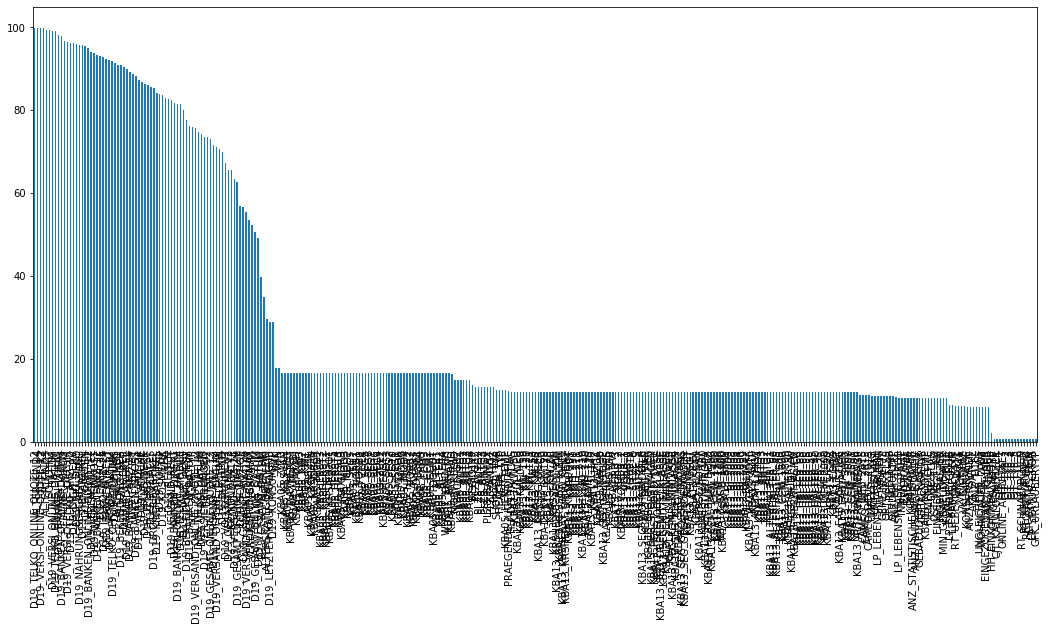

In [34]:
# Investigate patterns in the amount of missing data in each column.
azdias_nan.percent.plot.bar(figsize=(18, 8));

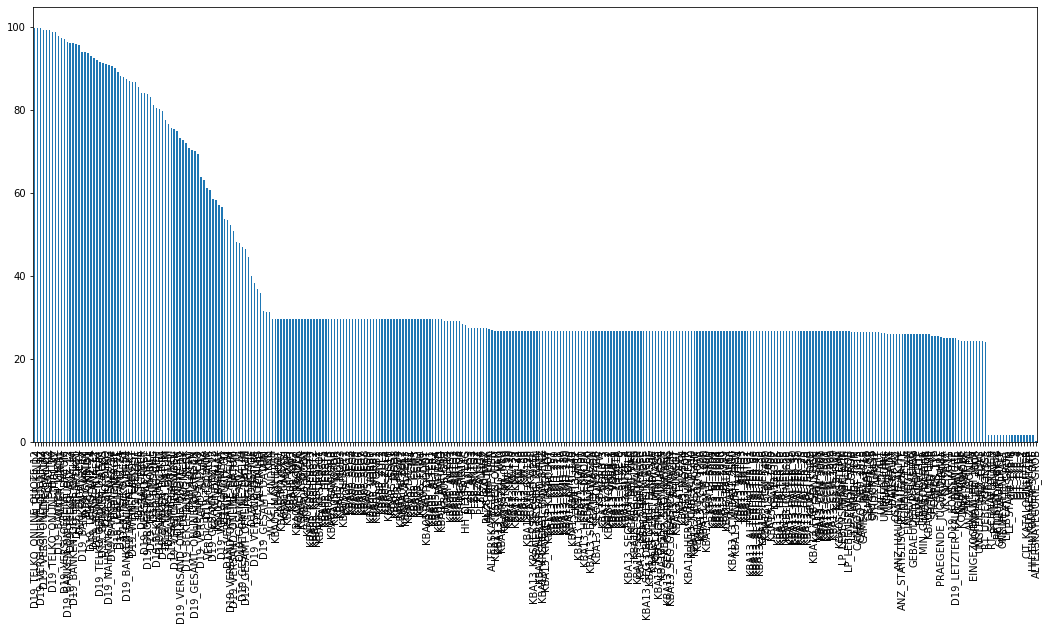

In [35]:
# Investigate patterns in the amount of missing data in each column.
customers_nan.percent.plot.bar(figsize=(18, 8));

In [36]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Drop the outlier columns
columns_to_drop = azdias_nan[azdias_nan.percent > 30.].index.tolist()
#columns_to_drop
azdias.drop(columns_to_drop, axis=1, inplace=True)
customers.drop(columns_to_drop, axis=1, inplace=True)

In [37]:
df_features.head()

,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
0,LNR,,,order,
1,AGER_TYP,AGER_TYP,person,categorical,-1
2,AKT_DAT_KL,,,categorical,
3,ALTER_HH,ALTER_HH,household,interval,0
4,ALTER_KIND1,,household,categorical,


In [38]:
len(columns_to_drop)

78

In [39]:
# drop these columns from df_features
for col in columns_to_drop:
    print(col)
    df_features.drop(df_features[df_features.attribute==col].index, inplace=True)
df_features.shape

D19_TELKO_ONLINE_QUOTE_12
ALTER_KIND4
D19_VERSI_ONLINE_QUOTE_12
TITEL_KZ
ALTER_KIND3
SOHO_KZ
D19_VERSI_ONLINE_DATUM
D19_TELKO_ONLINE_DATUM
D19_BANKEN_LOKAL
D19_BANKEN_OFFLINE_DATUM
ALTER_KIND2
D19_VERSI_OFFLINE_DATUM
D19_TELKO_ANZ_12
D19_DIGIT_SERV
D19_BIO_OEKO
D19_NAHRUNGSERGAENZUNG
D19_TIERARTIKEL
D19_GARTEN
D19_BANKEN_ONLINE_QUOTE_12
D19_LEBENSMITTEL
D19_WEIN_FEINKOST
D19_BANKEN_ANZ_12
D19_ENERGIE
D19_TELKO_ANZ_24
D19_BANKEN_REST
D19_VERSI_ANZ_12
D19_TELKO_OFFLINE_DATUM
D19_BILDUNG
ALTER_KIND1
D19_BEKLEIDUNG_GEH
D19_RATGEBER
D19_SAMMELARTIKEL
D19_BANKEN_ANZ_24
D19_FREIZEIT
D19_BANKEN_GROSS
D19_VERSI_ANZ_24
D19_SCHUHE
D19_HANDWERK
D19_TELKO_REST
D19_SOZIALES
D19_DROGERIEARTIKEL
D19_KINDERARTIKEL
D19_LOTTO
D19_KOSMETIK
VHA
D19_REISEN
D19_VERSAND_REST
D19_BANKEN_DIREKT
D19_BANKEN_ONLINE_DATUM
D19_TELKO_MOBILE
D19_HAUS_DEKO
D19_BEKLEIDUNG_REST
D19_BANKEN_DATUM
AGER_TYP
D19_VERSAND_ONLINE_QUOTE_12
D19_TELKO_DATUM
D19_VERSI_DATUM
D19_VERSICHERUNGEN
EXTSEL992
D19_GESAMT_ONLINE_QUOTE_12
D19

(291, 5)

In [40]:
print(azdias.shape)
print(customers.shape)

(891221, 288)
(191652, 291)


In [41]:
azdias.to_csv('drop_30_azdias.csv', index=False)
customers.to_csv('drop_30_customers.csv', index=False)

In [ ]:
azdias.read_csv('drop_30_azdias.csv', index=False)
customers.read_csv('drop_30_customers.csv', index=False)

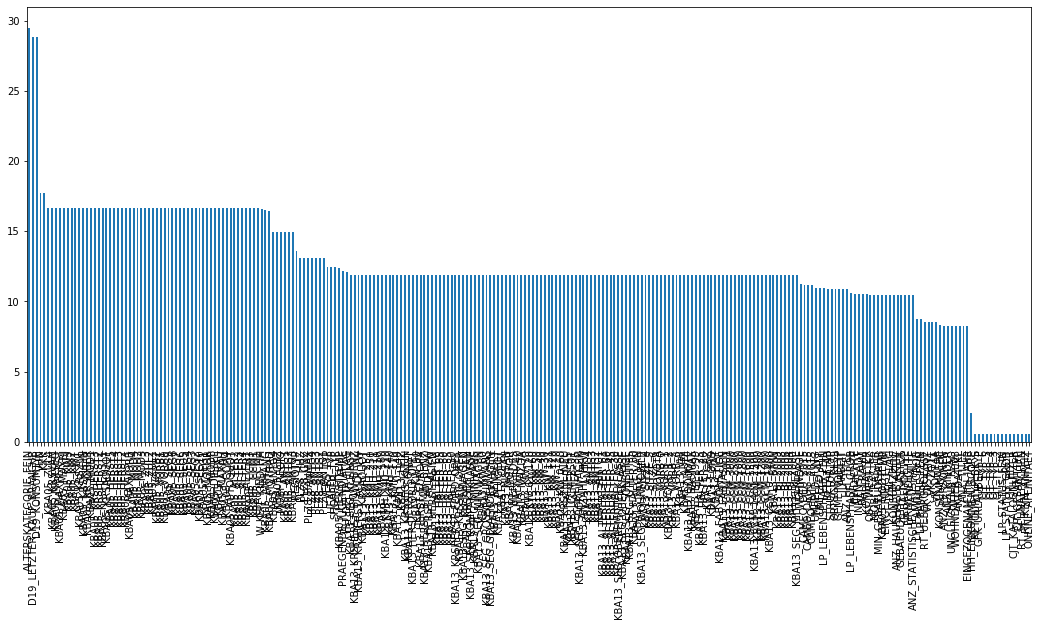

In [42]:
azdias_nan_drop = extract_columns_with_nan(azdias)
azdias_nan_drop.percent.plot.bar(figsize=(18, 8));

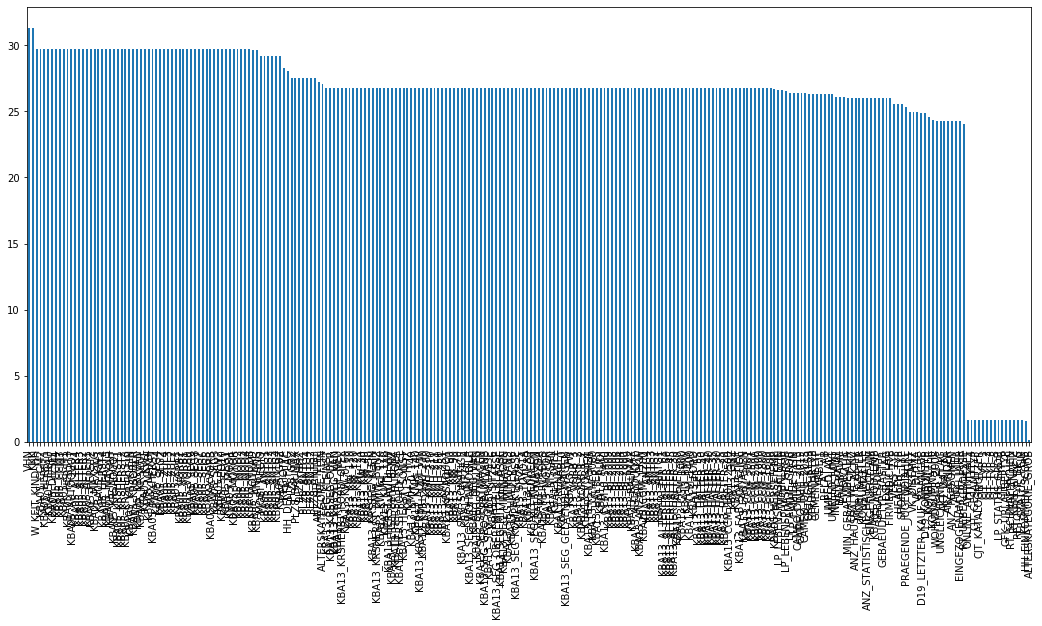

In [43]:
customers_nan_drop = extract_columns_with_nan(customers)
customers_nan_drop.percent.plot.bar(figsize=(18, 8));

From the above figure, we can see that there are a few spikes and there is a valey under 5 percentage. Check those spike what they are.

In [44]:
azdias_nan_drop.head(20)

,sum,percent
ALTERSKATEGORIE_FEIN,262947,29.50
D19_LETZTER_KAUF_BRANCHE,257113,28.85
D19_KONSUMTYP,257113,28.85
VHN,158064,17.74
KKK,158064,17.74
KBA05_ZUL4,148110,16.62
KBA05_KRSVAN,148110,16.62
KBA05_MAXSEG,148110,16.62
KBA05_MAXHERST,148110,16.62
KBA05_MAXBJ,148110,16.62


In [45]:
# Drop the outlier columns
columns_to_drop = azdias_nan_drop[azdias_nan_drop.percent > 17.].index.tolist()
#columns_to_drop
azdias.drop(columns_to_drop, axis=1, inplace=True)
customers.drop(columns_to_drop, axis=1, inplace=True)

In [46]:
len(columns_to_drop)

5

In [47]:
# drop these columns from df_features
for col in columns_to_drop:
    print(col)
    df_features.drop(df_features[df_features.attribute==col].index, inplace=True)
df_features.shape

ALTERSKATEGORIE_FEIN
D19_LETZTER_KAUF_BRANCHE
D19_KONSUMTYP
VHN
KKK


(286, 5)

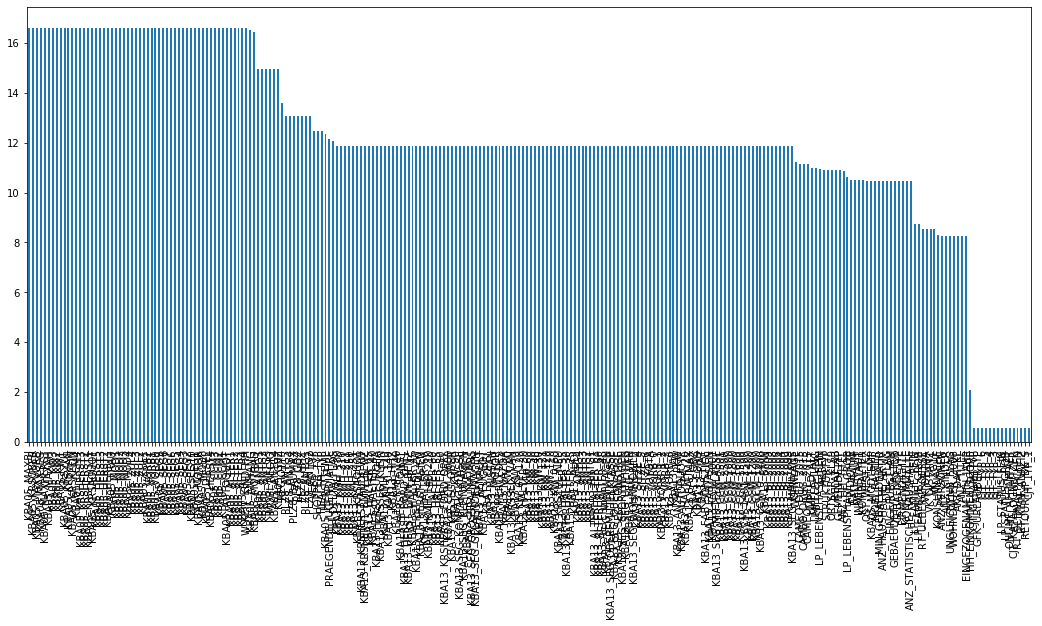

In [48]:
azdias_nan_drop_17 = extract_columns_with_nan(azdias)
azdias_nan_drop_17.percent.plot.bar(figsize=(18, 8));

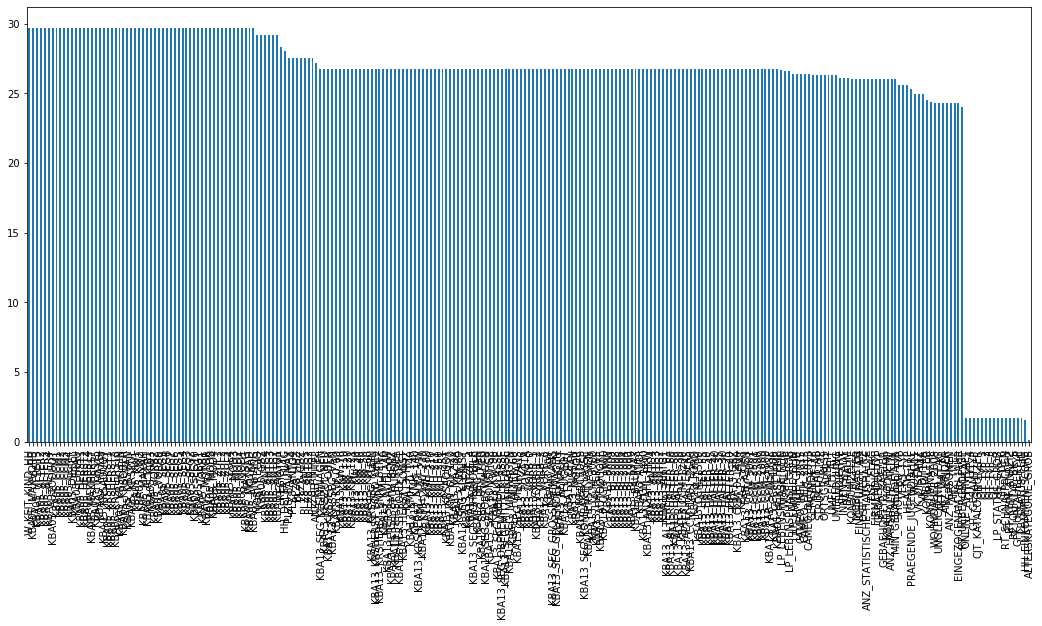

In [49]:
customers_nan_drop_17 = extract_columns_with_nan(customers)
customers_nan_drop_17.percent.plot.bar(figsize=(18, 8));

In [50]:
print(azdias.shape)
print(customers.shape)

(891221, 283)
(191652, 286)


Change date type data to numeric type

In [54]:
azdias.head().T

,0,1,2,3,4
LNR,910215,910220,910225,910226,910241
AKT_DAT_KL,NaN,9,9,1,1
ANZ_HAUSHALTE_AKTIV,NaN,11,10,1,3
ANZ_HH_TITEL,NaN,0,0,0,0
ANZ_KINDER,NaN,0,0,0,0
ANZ_PERSONEN,NaN,2,1,0,4
ANZ_STATISTISCHE_HAUSHALTE,NaN,12,7,2,3
ANZ_TITEL,NaN,0,0,0,0
ARBEIT,NaN,3,3,2,4
BALLRAUM,NaN,6,2,4,2


In [55]:
customers.head().T

,0,1,2,3,4
LNR,9626,9628,143872,143873,143874
AKT_DAT_KL,1,9,1,1,1
ANZ_HAUSHALTE_AKTIV,1,NaN,1,0,7
ANZ_HH_TITEL,0,NaN,0,NaN,0
ANZ_KINDER,0,0,0,0,0
ANZ_PERSONEN,2,3,1,0,4
ANZ_STATISTISCHE_HAUSHALTE,1,NaN,1,1,7
ANZ_TITEL,0,0,0,0,0
ARBEIT,1,NaN,3,1,3
BALLRAUM,3,NaN,7,7,3


columns: EINGEFUEGT_AM, EINGEZOGENAM_HH_JAHR(don't have explanation), MIN_GEBAEUDEJAHR
- I supposed this data was collected in 2017, according to the created date of the file.
- date -> years from 2017

In [56]:
azdias[['EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR']].head()

,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR
0,NaN,NaN,NaN
1,1992-02-10 00:00:00,2004.0,1992.0
2,1992-02-12 00:00:00,2000.0,1992.0
3,1997-04-21 00:00:00,1998.0,1997.0
4,1992-02-12 00:00:00,2004.0,1992.0


In [57]:
customers[['EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR']].head()

,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR
0,1992-02-12 00:00:00,1994.0,1992.0
1,NaN,2007.0,NaN
2,1992-02-10 00:00:00,1996.0,1992.0
3,1992-02-10 00:00:00,1997.0,1992.0
4,1992-02-12 00:00:00,1997.0,1992.0


In [58]:
azdias['EINGEFUEGT_AM'] = pd.to_datetime('2017-12-31') - pd.to_datetime(azdias['EINGEFUEGT_AM'])
azdias['EINGEFUEGT_AM']  = pd.to_timedelta(azdias['EINGEFUEGT_AM']).dt.days.astype('Int32')

In [59]:
azdias['EINGEZOGENAM_HH_JAHR'] = azdias['EINGEZOGENAM_HH_JAHR'].astype('Int32')
azdias['MIN_GEBAEUDEJAHR'] = azdias['MIN_GEBAEUDEJAHR'].astype('Int32')

azdias['EINGEZOGENAM_HH_JAHR'] = 2017 - azdias['EINGEZOGENAM_HH_JAHR']
azdias['MIN_GEBAEUDEJAHR'] = 2017 - azdias['MIN_GEBAEUDEJAHR']

In [60]:
azdias[['EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR']].head()

,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR
0,NaN,NaN,NaN
1,9456,13,25
2,9454,17,25
3,7559,19,20
4,9454,13,25


In [61]:
customers['EINGEFUEGT_AM'] = pd.to_datetime('2018-05-20') - pd.to_datetime(customers['EINGEFUEGT_AM'])
customers['EINGEFUEGT_AM']  = pd.to_timedelta(customers['EINGEFUEGT_AM']).dt.days.astype('Int32')

In [62]:
customers['EINGEZOGENAM_HH_JAHR'] = customers['EINGEZOGENAM_HH_JAHR'].astype('Int32')
customers['MIN_GEBAEUDEJAHR'] = customers['MIN_GEBAEUDEJAHR'].astype('Int32')

customers['EINGEZOGENAM_HH_JAHR'] = 2018 - customers['EINGEZOGENAM_HH_JAHR']
customers['MIN_GEBAEUDEJAHR'] = 2018 - customers['MIN_GEBAEUDEJAHR']

In [63]:
customers[['EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR']].head()

,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR
0,9454,23,25
1,NaN,10,NaN
2,9456,21,25
3,9456,20,25
4,9454,20,25


Step 1.2: Select and Re-Encode Features

In [64]:
df_features.head()

,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
0,LNR,,,order,
2,AKT_DAT_KL,,,categorical,
9,ANZ_HAUSHALTE_AKTIV,ANZ_HAUSHALTE_AKTIV,building,numeric,
10,ANZ_HH_TITEL,ANZ_HH_TITEL,building,numeric,
11,ANZ_KINDER,,building,numeric,


In [65]:
# change these 3 columns data type in df_features
for col in ['EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR']:
    print(col)
    df_features.loc[(df_features['attribute'] == col), 'type'] = 'numeric'
df_features

EINGEFUEGT_AM
EINGEZOGENAM_HH_JAHR
MIN_GEBAEUDEJAHR


,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
0,LNR,,,order,
2,AKT_DAT_KL,,,categorical,
9,ANZ_HAUSHALTE_AKTIV,ANZ_HAUSHALTE_AKTIV,building,numeric,
10,ANZ_HH_TITEL,ANZ_HH_TITEL,building,numeric,
11,ANZ_KINDER,,building,numeric,
12,ANZ_PERSONEN,ANZ_PERSONEN,household,numeric,
13,ANZ_STATISTISCHE_HAUSHALTE,,household,numeric,
14,ANZ_TITEL,ANZ_TITEL,household,numeric,
15,ARBEIT,,community,ordinal,
16,BALLRAUM,BALLRAUM,postcode,ordinal,-1


In [66]:
azdias.to_csv('azdias_283.csv', index=False)
customers.to_csv('customers_286.csv', index=False)

In [104]:
azdias=pd.read_csv('azdias_283.csv')

In [105]:
customers=pd.read_csv('customers_286.csv')

Change:

- PLZ8_BAUMAX mixed -> categorical
- CAMEO_INTL_2015 mixed -> categorical

In [106]:
df_features.loc[(df_features['type'] == 'mixed'), 'type'] = 'categorical'
df_features

,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
0,LNR,,,order,
2,AKT_DAT_KL,,,categorical,
9,ANZ_HAUSHALTE_AKTIV,ANZ_HAUSHALTE_AKTIV,building,numeric,
10,ANZ_HH_TITEL,ANZ_HH_TITEL,building,numeric,
11,ANZ_KINDER,,building,numeric,
12,ANZ_PERSONEN,ANZ_PERSONEN,household,numeric,
13,ANZ_STATISTISCHE_HAUSHALTE,,household,numeric,
14,ANZ_TITEL,ANZ_TITEL,household,numeric,
15,ARBEIT,,community,ordinal,
16,BALLRAUM,BALLRAUM,postcode,ordinal,-1


In [107]:
# Fill categorical and ordinal datatype missing data
df_features_cate = df_features[(df_features.type=='ordinal') | (df_features.type=='categorical')]
df_features_cate

,attribute,attribute(excel),Unnamed: 2,type,missing_or_unknown
2,AKT_DAT_KL,,,categorical,
15,ARBEIT,,community,ordinal,
16,BALLRAUM,BALLRAUM,postcode,ordinal,-1
17,CAMEO_DEU_2015,CAMEO_DEUG_2015,microcell_rr4,categorical,"-1,X,XX"
18,CAMEO_DEUG_2015,CAMEO_DEU_2015,microcell_rr4,categorical,"-1,X,XX"
19,CAMEO_INTL_2015,CAMEO_DEUINTL_2015,microcell_rr4,categorical,"-1,X,XX"
20,CJT_GESAMTTYP,CJT_GESAMTTYP,person,categorical,0
21,CJT_KATALOGNUTZER,,person,categorical,0
22,CJT_TYP_1,,person,categorical,0
23,CJT_TYP_2,,person,categorical,0


In [112]:
cate_columns = df_features_cate['attribute'].to_numpy()
len(cate_columns)

274

In [113]:
index = [269,270,271]
cate_columns_az = np.delete(cate_columns, index)
len(cate_columns_az)

271

In [116]:
# Imputation of missing values for categories
azdias[cate_columns_az] = azdias[cate_columns_az].fillna(azdias[cate_columns_az].mode().iloc[0])


In [117]:
customers[cate_columns] = customers[cate_columns].fillna(customers[cate_columns].mode().iloc[0])

In [118]:
# imputation of missing values for numeric
df_features_num = df_features[df_features.type=='numeric']
num_columns = df_features_num['attribute'].to_numpy()
print(len(num_columns))

azdias[num_columns] = azdias[num_columns].fillna(azdias[num_columns].median().iloc[0])
customers[num_columns] = customers[num_columns].fillna(customers[num_columns].median().iloc[0])

11


In [119]:
azdias.to_csv('clean_azdias.csv', index=False)
customers.to_csv('clean_customers.csv', index=False)

In [125]:
# check if has missing values
print(azdias.isnull().sum().sum())
print(customers.isnull().sum().sum())

0
0


## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')